In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

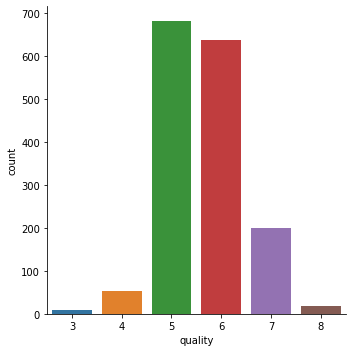

In [6]:
#Data Visualization
sns.catplot(x='quality',data=dataset,kind='count')


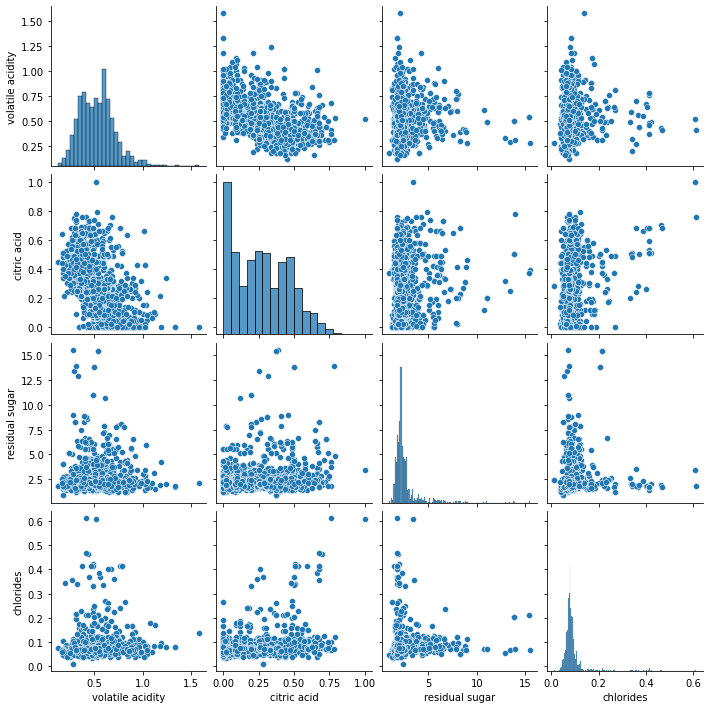

In [8]:
sns.pairplot(dataset.iloc[:,1:5],hue=None)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

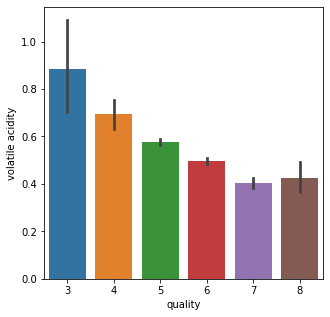

In [9]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=dataset)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

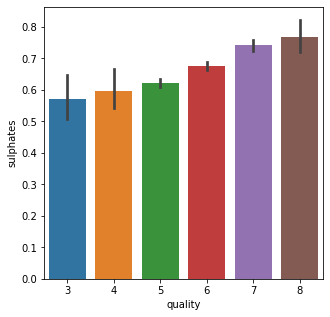

In [10]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

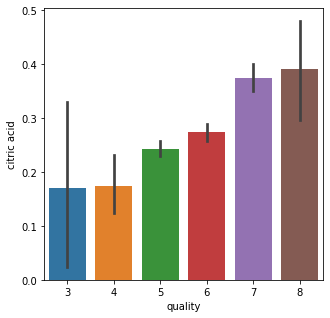

In [11]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=dataset)

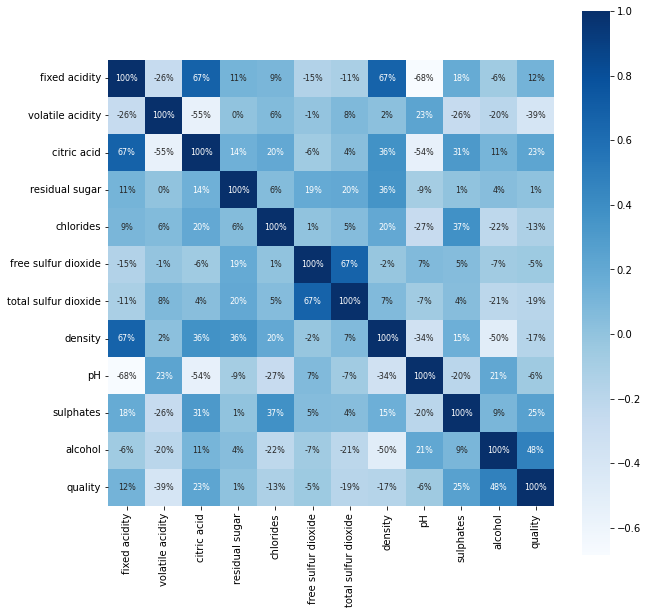

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues',fmt='.0%')
plt.show()

In [13]:
#Data Preprocessing
x=dataset.drop('quality',axis=1)
y=dataset['quality'].apply(lambda y_values: 1 if y_values>=6 else 0)

In [14]:
y.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [15]:
#Training and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [16]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [17]:
def models(x_train,y_train):
    from sklearn.metrics import mean_absolute_error
    #logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)

    #Kneighbors classifier
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train, y_train)

    #Svc linear
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(x_train, y_train)

    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(x_train, y_train)

    #decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train, y_train)

    #random forest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train, y_train)

    #print the model accuracy on the training data
    print('[0]Logistic Regression Training Accuracy:',log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:',knn.score(x_train, y_train))
    print('[2]Support Vector Machine(Linear Classifier) Training Accuracy:',svc_lin.score(x_train, y_train))
    print('[3]Gaussian Naive Bayes Training Accuracy:',gauss.score(x_train, y_train))
    print('[4]Decision Tree Classifier Training Accuracy:',tree.score(x_train, y_train))
    print('[5]Random Forest Classifier Training Accuracy:',forest.score(x_train, y_train))

    return log,knn,svc_lin,gauss,tree,forest


model=models(x_train,y_train)
print(model)


[0]Logistic Regression Training Accuracy: 0.7414512093411176
[1]K Nearest Neighbor Training Accuracy: 0.8148457047539617
[2]Support Vector Machine(Linear Classifier) Training Accuracy: 0.7397831526271893
[3]Gaussian Naive Bayes Training Accuracy: 0.7264386989157632
[4]Decision Tree Classifier Training Accuracy: 1.0
[5]Random Forest Classifier Training Accuracy: 0.9899916597164303
(LogisticRegression(random_state=0), KNeighborsClassifier(), SVC(kernel='linear', random_state=0), GaussianNB(), DecisionTreeClassifier(criterion='entropy', random_state=0), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))


In [18]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm=confusion_matrix(y_test,model[i].predict(x_test))
    TN=cm[0][0]
    TP=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]
    print(cm)
   
    print('model[{}] Testing Accuracy = "{}!"'.format(i,(TP+TN)/(TP+TN+FN+FP)))
    print()

[[137  48]
 [ 52 163]]
model[0] Testing Accuracy = "0.75!"

[[112  73]
 [ 52 163]]
model[1] Testing Accuracy = "0.6875!"

[[143  42]
 [ 61 154]]
model[2] Testing Accuracy = "0.7425!"

[[129  56]
 [ 49 166]]
model[3] Testing Accuracy = "0.7375!"

[[129  56]
 [ 47 168]]
model[4] Testing Accuracy = "0.7425!"

[[156  29]
 [ 40 175]]
model[5] Testing Accuracy = "0.8275!"



In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model',i)
    #check precision, recall, f1-score
    print(classification_report(y_test, model[i].predict(x_test)))
    #Another way to get the models accuracy on the test data
    print(accuracy_score(y_test,model[i].predict(x_test)))
    print()



Model 0
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       185
           1       0.77      0.76      0.77       215

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400

0.75

Model 1
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       185
           1       0.69      0.76      0.72       215

    accuracy                           0.69       400
   macro avg       0.69      0.68      0.68       400
weighted avg       0.69      0.69      0.69       400

0.6875

Model 2
              precision    recall  f1-score   support

           0       0.70      0.77      0.74       185
           1       0.79      0.72      0.75       215

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.75      0.74   

[1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0
 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1
 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1
 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1
 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0
 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0
 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0]

1109    1
1032    0
1002    1
487     1
979     0
       ..
489     1
362     0
526     0
442     1
1229    0
Name: quality, Length: 400, dtype: int64


<AxesSubplot:>

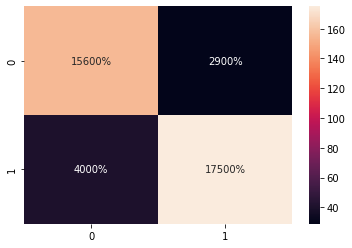

In [20]:
#Print Prediction of Random Forest Classifier Model
y_pred=model[5].predict(x_test)
print(y_pred)
print()
print(y_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0%')


<AxesSubplot:>

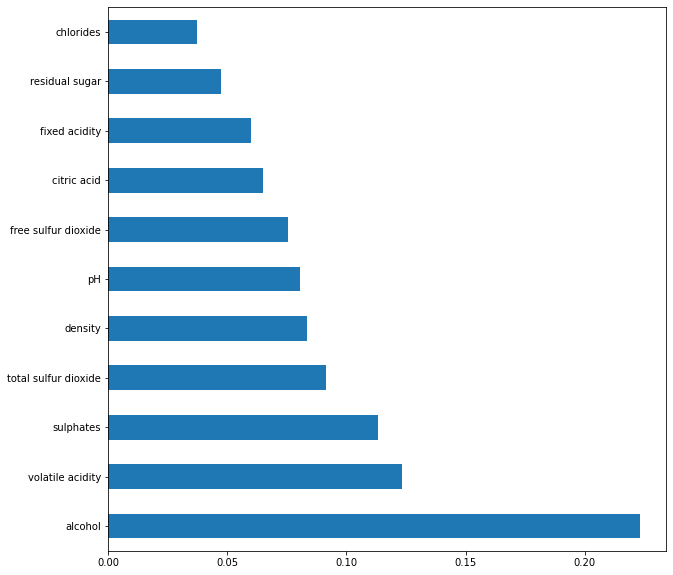

In [21]:

feat_importances = pd.Series(model[4].feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

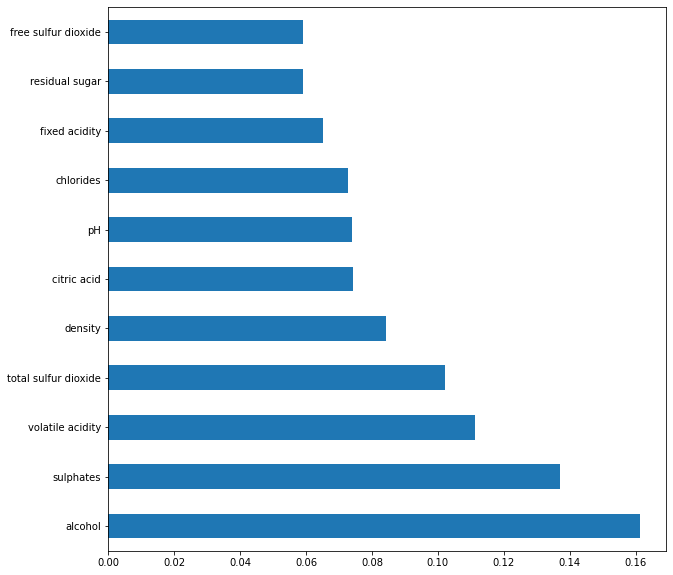

In [22]:
feat_importances = pd.Series(model[5].feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [24]:
#Filtering df for only good quality
df_temp = dataset[dataset['quality']>=6 ]
df_temp.describe()
# Filtering df for only bad quality
df_temp2 = dataset[dataset['quality']<=5]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,744.000000,744.000000,744.000000,744.00000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,8.142204,0.589503,0.237755,2.54207,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
std,1.572396,0.177956,0.183368,1.39355,0.055781,10.890291,36.720468,0.001598,0.154296,0.176194,0.758007,0.339894
min,4.600000,0.180000,0.000000,1.20000,0.039000,3.000000,6.000000,0.992560,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.460000,0.080000,1.90000,0.074000,8.000000,23.750000,0.996120,3.200000,0.520000,9.400000,5.000000
50%,7.800000,0.590000,0.220000,2.20000,0.081000,14.000000,45.000000,0.996935,3.310000,0.580000,9.700000,5.000000
75%,8.900000,0.680000,0.360000,2.60000,0.094000,23.000000,78.000000,0.997900,3.400000,0.650000,10.300000,5.000000
max,15.900000,1.580000,1.000000,15.50000,0.611000,68.000000,155.000000,1.003150,3.900000,2.000000,14.900000,5.000000


In [25]:
df_temp2 = dataset[dataset['quality']<=5]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,744.000000,744.000000,744.000000,744.00000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,8.142204,0.589503,0.237755,2.54207,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
std,1.572396,0.177956,0.183368,1.39355,0.055781,10.890291,36.720468,0.001598,0.154296,0.176194,0.758007,0.339894
min,4.600000,0.180000,0.000000,1.20000,0.039000,3.000000,6.000000,0.992560,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.460000,0.080000,1.90000,0.074000,8.000000,23.750000,0.996120,3.200000,0.520000,9.400000,5.000000
50%,7.800000,0.590000,0.220000,2.20000,0.081000,14.000000,45.000000,0.996935,3.310000,0.580000,9.700000,5.000000
75%,8.900000,0.680000,0.360000,2.60000,0.094000,23.000000,78.000000,0.997900,3.400000,0.650000,10.300000,5.000000
max,15.900000,1.580000,1.000000,15.50000,0.611000,68.000000,155.000000,1.003150,3.900000,2.000000,14.900000,5.000000
